<a href="https://colab.research.google.com/github/wendelpires1976/mercado_de_capitais/blob/main/C%C3%B3pia_de_An%C3%A1lise_1_Trade_Quantitativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [2]:
## Run This Cell for Colab
!pip install yfinance
!pip install vectorbt
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 526 kB 5.1 MB/s 
     |████████████████████████████████| 292 kB 53.4 MB/s 
     |████████████████████████████████| 1.6 MB 43.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 256 kB/s 


In [3]:
import vectorbt as vbt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Definindo parâmetros

In [4]:
# Análise de um Ativo Americano
codigo = 'AAPL'
ativos_comparacao = [codigo, '^GSPC', 'AMZN', 'NFLX']

data_inicial = '2018-01-01'  
data_final = '2019-01-01'

# Os preços de fechamentos dos ativos
vbt.YFData.download(ativos_comparacao, start=data_inicial, end=data_final).get('Close')

symbol,AAPL,^GSPC,AMZN,NFLX
Date,,,,
2018-01-02 05:00:00+00:00,40.950500,2695.810059,59.450500,201.070007
2018-01-03 05:00:00+00:00,40.943371,2713.060059,60.209999,205.050003
2018-01-04 05:00:00+00:00,41.133549,2723.989990,60.479500,205.630005
2018-01-05 05:00:00+00:00,41.601856,2743.149902,61.457001,209.990005
2018-01-08 05:00:00+00:00,41.447342,2747.709961,62.343498,212.050003
...,...,...,...,...
2018-12-24 05:00:00+00:00,35.429195,2351.100098,67.197998,233.880005
2018-12-26 05:00:00+00:00,37.924168,2467.699951,73.544998,253.669998
2018-12-27 05:00:00+00:00,37.678043,2488.830078,73.082001,255.570007


## Baixando os dados

In [5]:
precos = vbt.YFData.download(codigo, start=data_inicial, end=data_final).get()
fechamento = vbt.YFData.download(codigo, start=data_inicial, end=data_final).get('Close')

# Analisando a Série

In [6]:
fechamento.vbt.plot().show()

In [7]:
precos.vbt.ohlcv.plot().show()

## Gráfico comparativo

Com investimento inicial de \$1 (ou R\$ 1)

In [8]:
vbt.YFData.download(ativos_comparacao,
                    start=data_inicial,
                    end=data_final).plot(column='Close', base=1).show()

## Gráfico Quant Stat

Retorno Cumulativo, Drawdown e Retorno Diário

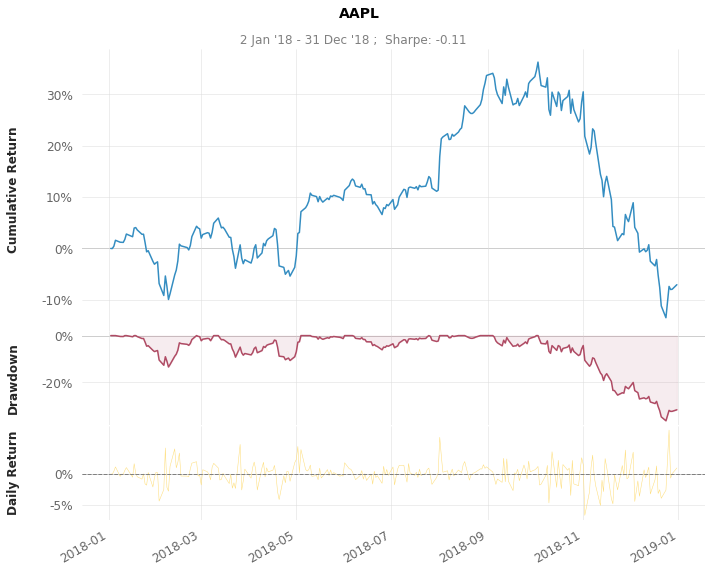

In [9]:
warnings.filterwarnings('ignore')

retornos = fechamento.vbt.to_returns()
retornos.vbt.returns.qs.plot_snapshot(title=codigo)

comentar sobre o ativo acima

# Analisando Estratégias de Trade

## Simple Moving Averages

In [10]:
n_periodos_curta = 20
n_periodos_longa = 50

media_curta = vbt.MA.run(fechamento, n_periodos_curta, short_name='media_curta')
media_longa = vbt.MA.run(fechamento, n_periodos_longa, short_name='media_longa')

fig = fechamento.vbt.plot(trace_kwargs=dict(name='Preço de Fechamento'))
media_curta.ma.vbt.plot(trace_kwargs=dict(name='Média Móvel Curta'), fig=fig)
media_longa.ma.vbt.plot(trace_kwargs=dict(name='Média Móvel Longa'), fig=fig)

fig.show()

#Médias curta consegue identicar movivimentos mais rápidos, identifica a virada da tendência muito rapido, porém tende a ter mais sinais falsos. o bom é ter uma combinação das duas, curtas e longas, mas nesses ativos utilizaria a média curta. 

## Relative Strength Index

In [11]:
rsi = vbt.RSI.run(fechamento)
rsi.plot().show()

O RSI ou IFR (Índice de força relativa, é uma ferramenta utilizada pra o trader ter indicativos de compra e venda de ativos, no gráfico acima utiliza o 70/30 para venda e compra respectivamente. corrige um movimento errático, percebe que em alguns momentos tem falsos movimentos e divergência. 

## Stochastics

The TA-Lib Stoch function returns two lines slowk and slowd which can then be used to generate the buy/sell indicators.
A crossover signal occurs when the two lines cross in the overbought region (commonly above 80) or oversold region (commonly below 20).
When a slowk line crosses below the slowd line in the overbought region it is considered a sell indicator.
Conversely, when an increasing slowk line crosses above the slowd line in the oversold region it is considered a buy indicator.

In [12]:
vbt.STOCH.run(precos['High'], precos['Low'], precos['Close']).plot().show()

Um indicador de momento, um indicador muito rápido, nem sempre tenho que vender quando estiver muito alto ou ao contrário. No gráfico podemos perceber que mesmo na tendência de sobrecompra ele se mantem por um certo periodo. 

## Bollinger Bands

In [13]:
vbt.BBANDS.run(fechamento).plot().show()

**Pesquise sobre bandas de bolinger e escreva aqui a interpretação do gráfico acima.**